In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv(r'C:\Users\N.NAGESH\Desktop\intern assign\DS-Intern-Assignment\data\data.csv')

In [49]:
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [50]:
data.shape

(16857, 29)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [52]:
data.isnull().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [53]:
for col in data.columns:
    if col == 'timestamp':
        continue
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [54]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [55]:
data_sorted = data.sort_values(by=['timestamp'])

In [56]:
data_sorted.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [57]:
data_sorted['timestamp'] = pd.to_datetime(data_sorted['timestamp'])
unique_dates = data_sorted['timestamp'].dt.date.unique()
print(f"Number of unique days in the dataset: {len(unique_dates)}")


Number of unique days in the dataset: 129


In [58]:
data_sorted['date'] = data_sorted['timestamp'].dt.date
data_sorted['time'] = data_sorted['timestamp'].dt.time


time_summary = data_sorted.groupby('date')['time'].agg(
    min_time='min',
    max_time='max',
    count_timepoints='count'
)

print("Time range and number of time points for each day:")
print(time_summary)


Time range and number of time points for each day:
            min_time  max_time  count_timepoints
date                                            
2016-01-11  17:00:00  23:50:00                42
2016-01-12  00:00:00  23:50:00               143
2016-01-13  00:00:00  23:50:00               144
2016-01-14  00:00:00  23:50:00               145
2016-01-15  00:00:00  23:50:00               147
...              ...       ...               ...
2016-10-03  20:10:00  20:10:00                 1
2016-10-04  06:10:00  06:10:00                 1
2016-11-03  00:50:00  00:50:00                 1
2016-11-04  13:20:00  13:20:00                 1
2016-12-01  15:50:00  15:50:00                 1

[129 rows x 3 columns]


## the dataset contains the data for the year 2016

### lets look for any outliers in the equipment_energy_consumption

In [59]:
Q1 = data_sorted['equipment_energy_consumption'].quantile(0.25)
Q3 = data_sorted['equipment_energy_consumption'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_sorted[
    (data_sorted['equipment_energy_consumption'] < lower_bound) | 
    (data_sorted['equipment_energy_consumption'] > upper_bound)
]

outliers

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,date,time
10,2016-01-11 18:40:00,230.000000,70.0,19.926667,45.863333,19.356667,44.400000,19.790000,44.900000,18.890000,...,5.966667,734.366667,91.333333,NaN,40.000000,4.633333,10.298729,10.298729,2016-01-11,18:40:00
11,2016-01-11 18:50:00,580.000000,60.0,20.066667,46.396667,19.426667,NaN,19.790000,44.826667,19.000000,...,5.983333,734.433333,221.668765,5.833333,40.000000,4.616667,8.827838,NaN,2016-01-11,18:50:00
12,2016-01-11 19:00:00,430.000000,50.0,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.000000,...,6.000000,734.500000,91.000000,6.000000,40.000000,4.600000,34.351142,34.351142,2016-01-11,19:00:00
13,2016-01-11 19:10:00,250.000000,40.0,20.260000,52.726667,19.730000,45.100000,19.890000,45.493333,35.921144,...,6.000000,734.616667,NaN,6.000000,40.000000,4.516667,19.205186,NaN,2016-01-11,19:10:00
21,2016-01-11 20:30:00,190.000000,40.0,20.963333,NaN,20.260000,45.530000,20.200000,47.026667,19.260000,...,6.000000,735.300000,87.500000,6.000000,40.000000,4.000000,10.607126,10.607126,2016-01-11,20:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16783,2016-05-06 18:20:00,-200.000000,0.0,24.790000,36.696667,24.890000,33.290000,24.390000,NaN,23.890000,...,22.433333,752.500000,43.000000,4.666667,40.000000,9.033333,20.829435,20.829435,2016-05-06,18:20:00
16784,2016-05-06 18:30:00,190.000000,10.0,24.790000,37.263333,24.890000,33.566667,24.390000,36.090000,23.890000,...,22.450000,752.500000,43.000000,4.500000,40.000000,9.050000,23.897046,23.897046,2016-05-06,18:30:00
16794,2016-05-06 20:00:00,-944.566411,NaN,NaN,38.790000,24.060000,36.772000,24.700000,37.000000,23.963333,...,21.100000,752.300000,47.000000,3.000000,40.000000,9.200000,20.295014,20.295014,2016-05-06,20:00:00
16848,2016-08-02 18:20:00,480.000000,20.0,22.926667,43.623333,22.430000,39.933333,24.566667,42.826667,21.100000,...,7.933333,741.366667,69.666667,NaN,30.666667,2.666667,2.069630,2.069630,2016-08-02,18:20:00


In [61]:
data_sorted.shape

(16857, 31)

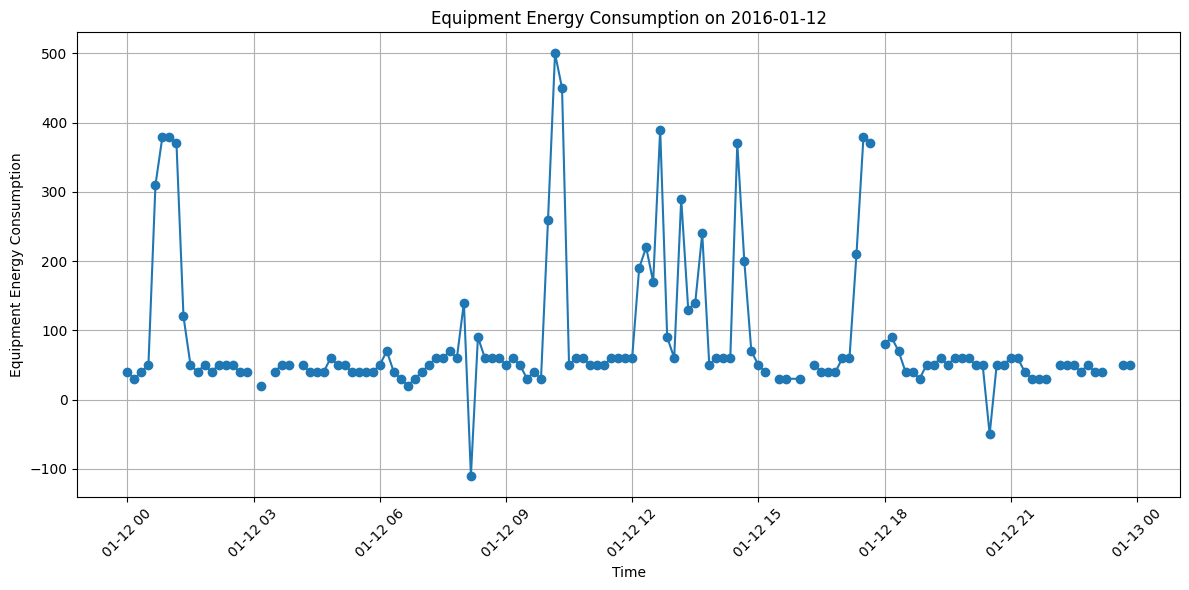

In [40]:
jan_11_data = data_sorted[data_sorted['timestamp'].dt.date == pd.to_datetime('2016-01-12').date()]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(jan_11_data['timestamp'], jan_11_data['equipment_energy_consumption'], marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Equipment Energy Consumption')
plt.title('Equipment Energy Consumption on 2016-01-12')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

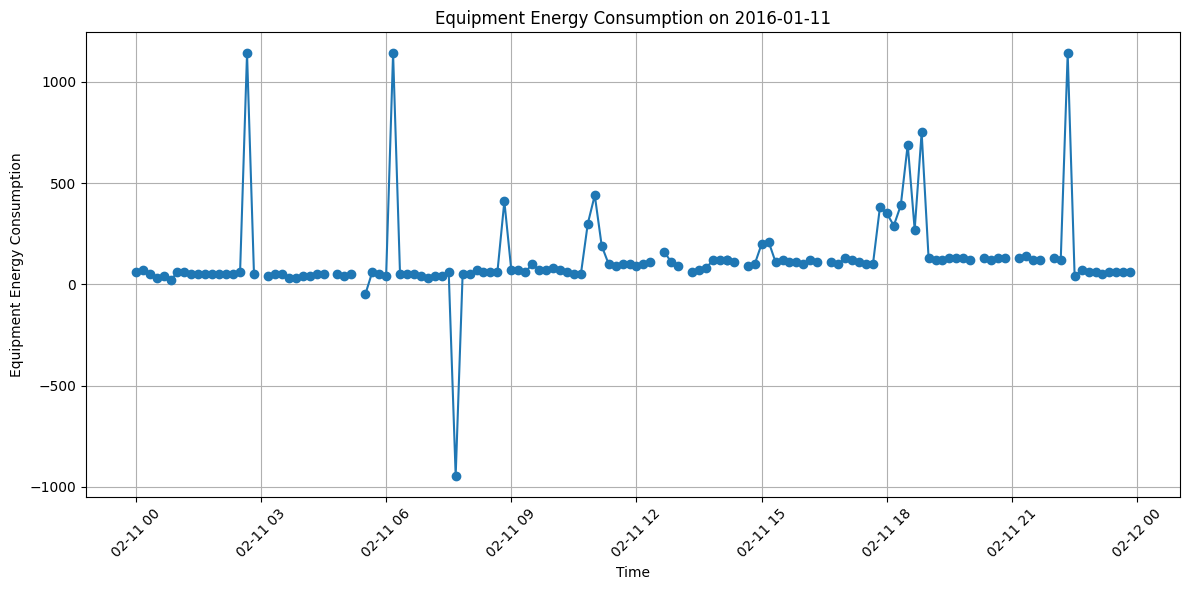

In [ ]:
feb_11_data = data_sorted[data_sorted['timestamp'].dt.date == pd.to_datetime('2016-02-11').date()]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(feb_11_data['timestamp'], feb_11_data['equipment_energy_consumption'], marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Equipment Energy Consumption')
plt.title('Equipment Energy Consumption on 2016-02-11')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

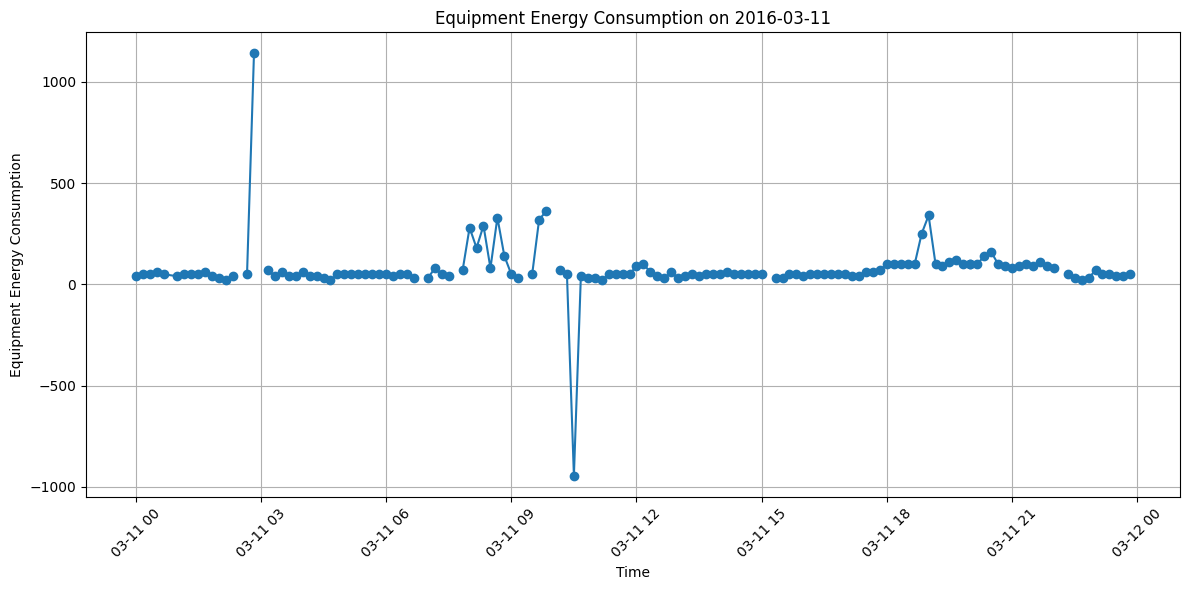

In [60]:
March_11_data = data_sorted[data_sorted['timestamp'].dt.date == pd.to_datetime('2016-03-11').date()]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(March_11_data['timestamp'], March_11_data['equipment_energy_consumption'], marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Equipment Energy Consumption')
plt.title('Equipment Energy Consumption on 2016-03-11')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

for specific date 

In [ ]:
specific_date = pd.to_datetime('2016-01-11').date()
day_data = data_sorted[data_sorted['timestamp'].dt.date == specific_date]


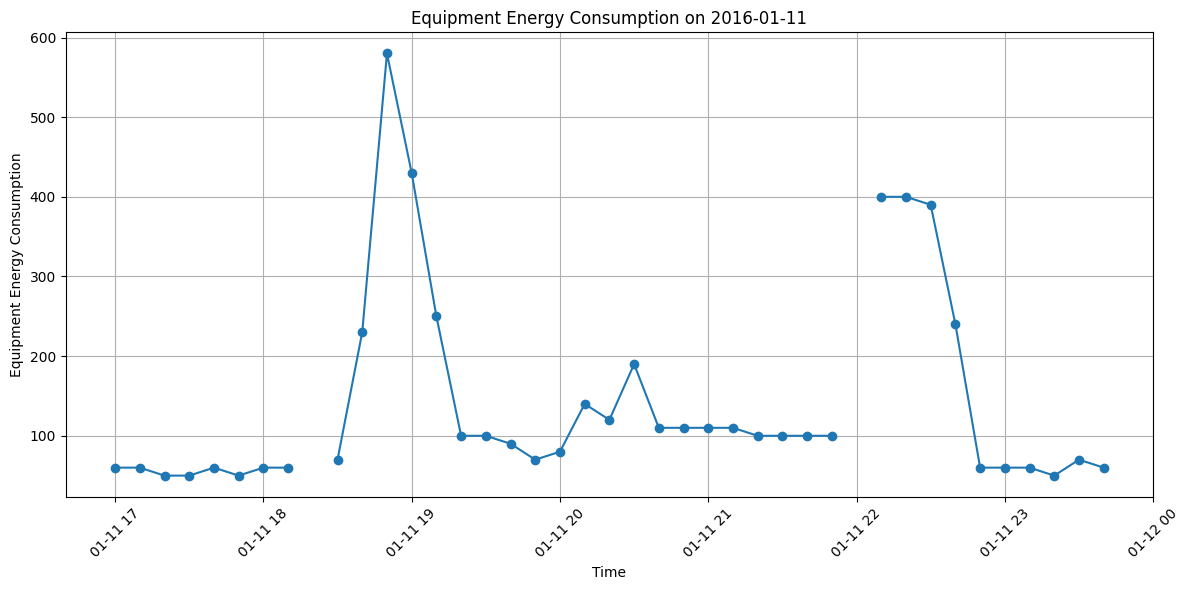

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(day_data['timestamp'], day_data['equipment_energy_consumption'], marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Equipment Energy Consumption')
plt.title(f'Equipment Energy Consumption on {specific_date}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


there is no significant pattern that is observed in the timplots


## imputing the null values with decision tree regressor 

In [63]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor



numeric_data = data.select_dtypes(include=['int','float'])
imp = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, random_state=0)



In [64]:
imputed_array = imp.fit_transform(numeric_data)
imputed_df = pd.DataFrame(imputed_array, columns=numeric_data.columns)

c:\Users\N.NAGESH\Desktop\intern assign\myenv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [65]:
non_numeric_cols = data.select_dtypes(exclude='number').columns
final_data = pd.concat([imputed_df, data[non_numeric_cols].reset_index(drop=True)], axis=1)

In [66]:
final_data.isnull().sum()

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
timestamp                       0
dtype: int64

## replaced all the null values using decision tree regressor

In [30]:
final_data.describe()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,...,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000
mean,96.543337,3.926646,21.243108,39.007830,19.797199,39.472274,21.657320,38.202041,20.236106,37.922570,...,18.857768,40.326581,6.212414,755.746977,78.959312,4.197597,38.455715,2.763692,24.843870,25.128997
std,185.356193,14.692881,2.190042,10.101227,2.971355,10.225108,2.620200,10.152535,2.786847,10.820313,...,2.547402,11.189051,7.552918,13.826690,28.709380,4.432162,21.644579,6.130085,26.239145,25.474020
min,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,-81.446225,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,50.000000,0.000000,20.500000,37.012857,18.600000,37.760000,20.528571,36.590000,19.260000,35.163333,...,17.890000,38.230000,3.000000,750.800000,71.166667,2.000000,29.000000,0.450000,12.177147,12.273440
50%,60.000000,0.000000,21.323333,39.230000,19.600000,40.326667,21.767500,38.400000,20.290000,38.090000,...,18.890000,40.400000,6.000000,756.200000,84.333333,4.000000,40.000000,2.750000,24.795371,24.905165
75%,100.000000,0.000000,22.100000,42.500000,20.790000,43.000000,22.760000,41.400000,21.356667,41.530000,...,20.200000,43.790000,9.250000,762.100000,92.000000,6.000000,40.000000,5.300000,37.933477,37.952960
max,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,81.446225,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


to understand the distribution of the data we shall look into the histplot of all the features


[]

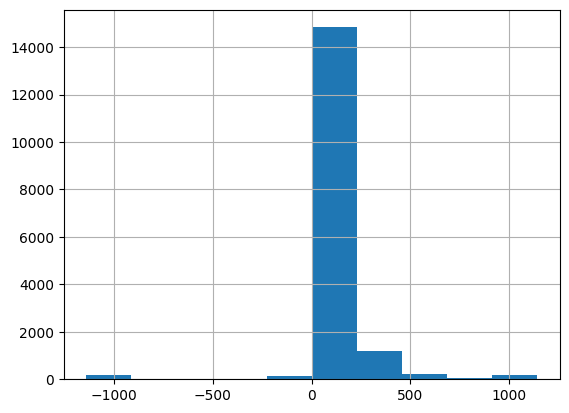

In [34]:
final_data['equipment_energy_consumption'].hist()
plt.plot()

In [33]:
len(final_data[final_data['equipment_energy_consumption']<0])

333

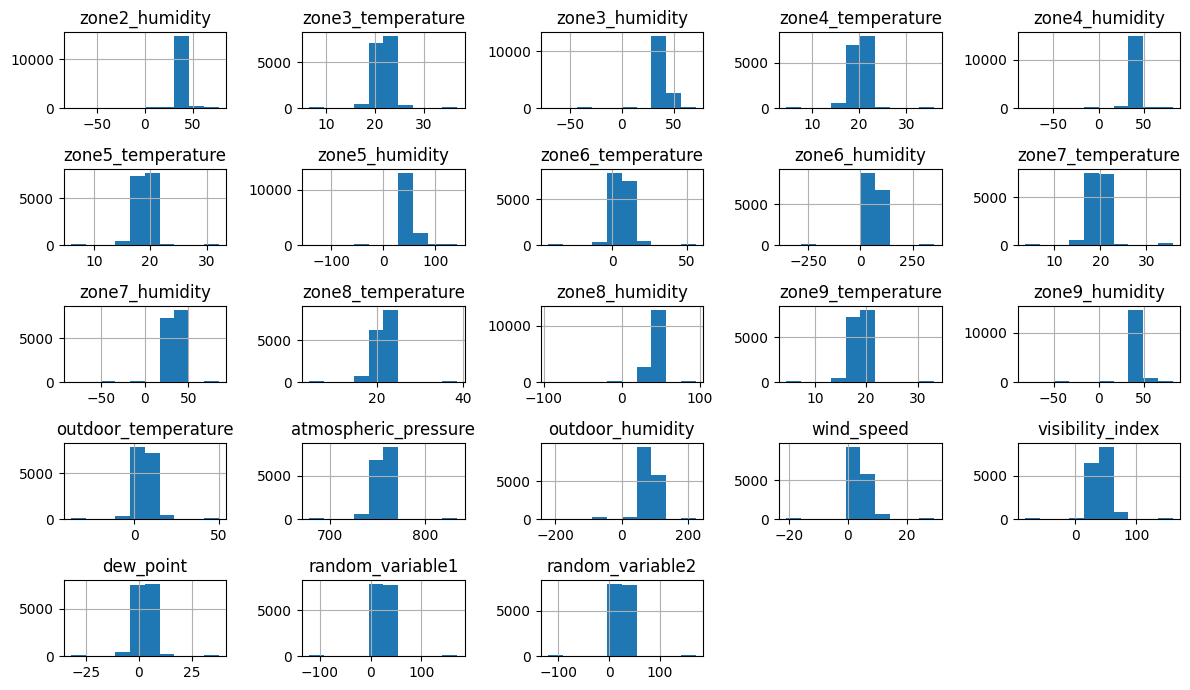

In [ ]:
final_datadata.hist(figsize=(12,7))
plt.tight_layout()
plt.show()

to understand the correlation of features between different varibles 

[]

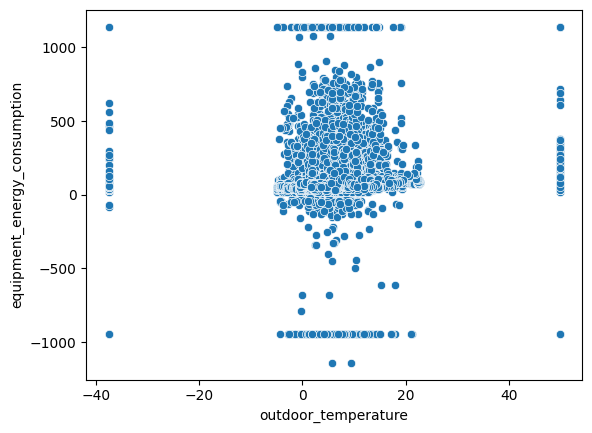

In [40]:
sns.scatterplot(x='outdoor_temperature', y='equipment_energy_consumption', data=final_data)
plt.plot()

[]

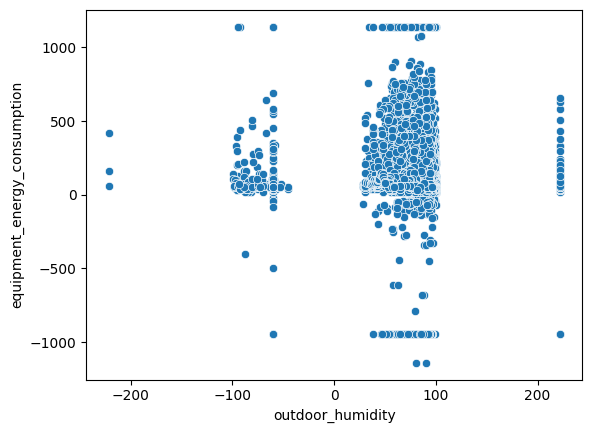

In [49]:
sns.scatterplot(x='outdoor_humidity', y='equipment_energy_consumption', data=final_data)
plt.plot()

[]

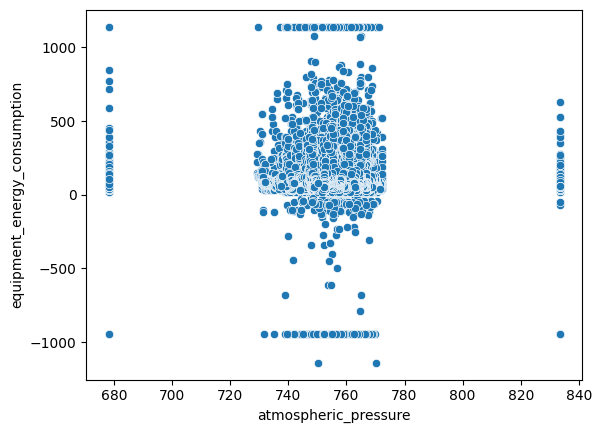

In [50]:
sns.scatterplot(x='atmospheric_pressure', y='equipment_energy_consumption', data=final_data)
plt.plot()

[]

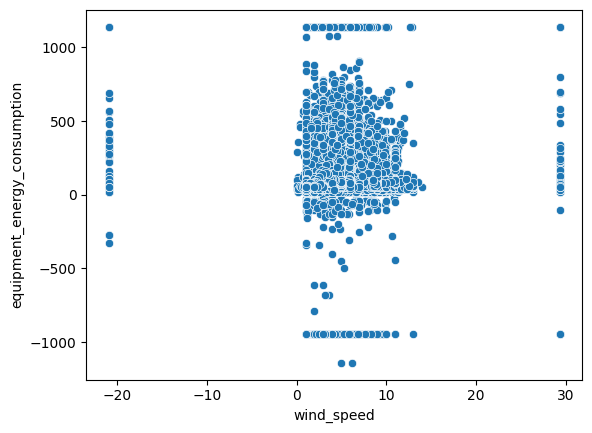

In [51]:
sns.scatterplot(x='wind_speed', y='equipment_energy_consumption', data=final_data)
plt.plot()

[]

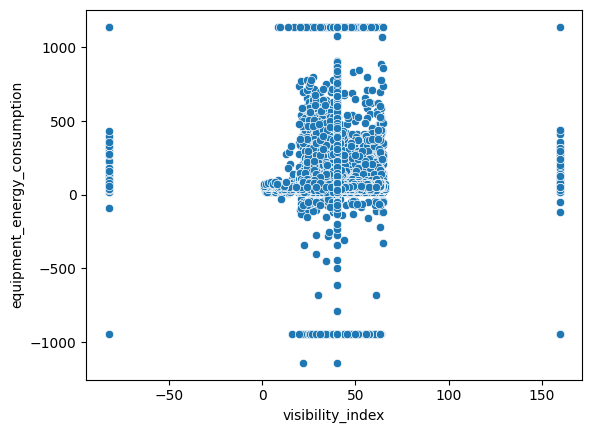

In [52]:
sns.scatterplot(x='visibility_index', y='equipment_energy_consumption', data=final_data)
plt.plot()

[]

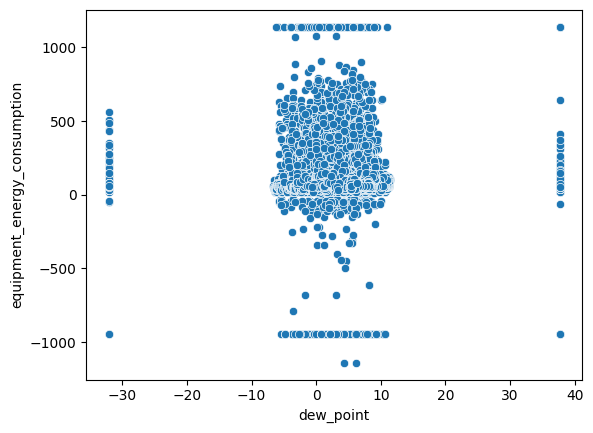

In [53]:
sns.scatterplot(x='dew_point', y='equipment_energy_consumption', data=final_data)
plt.plot()

[]

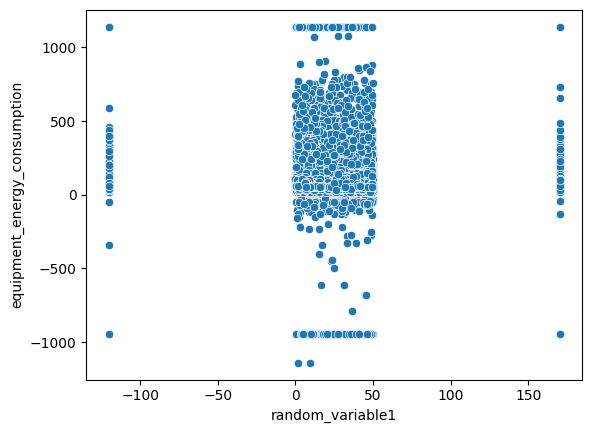

In [54]:
sns.scatterplot(x='random_variable1', y='equipment_energy_consumption', data=final_data)
plt.plot()

[]

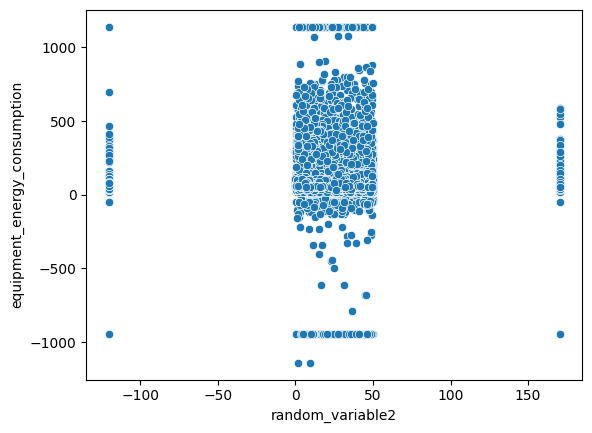

In [ ]:
sns.scatterplot(x='random_variable2', y='equipment_energy_consumption', data=final_data)
plt.plot()

## trying feature engineering

In [68]:
df = final_data.copy()

In [77]:
df['rand'] = df['random_variable1'] * df['random_variable2']

[]

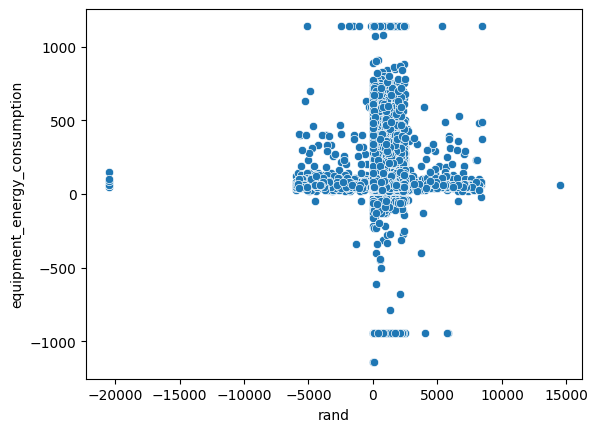

In [78]:
sns.scatterplot(x='rand', y='equipment_energy_consumption', data=df)
plt.plot()

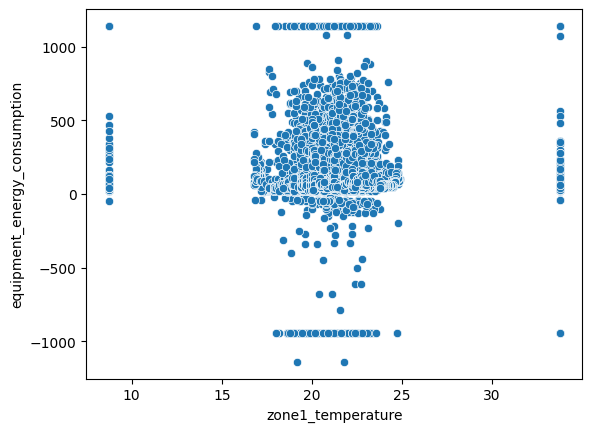

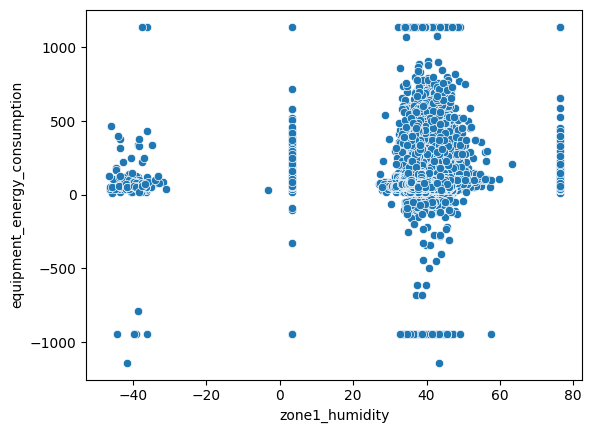

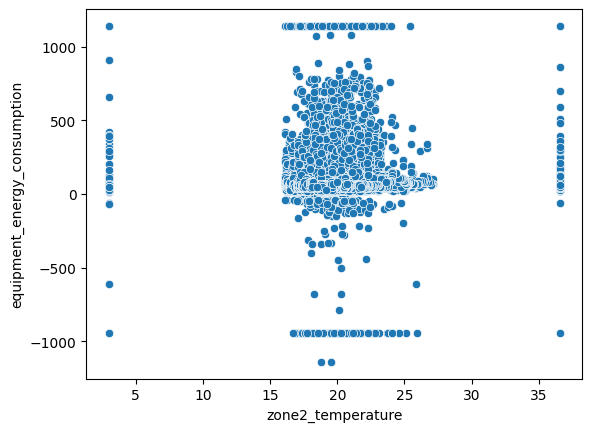

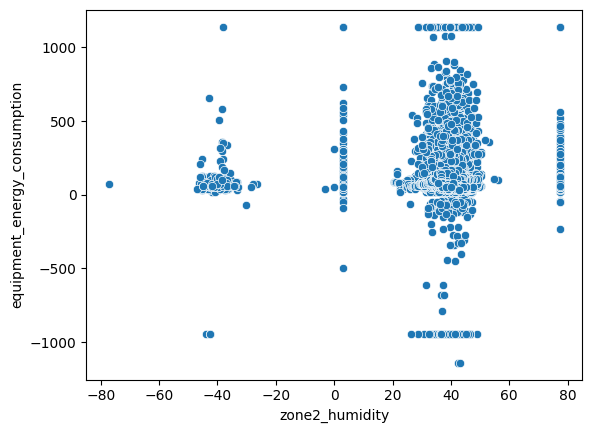

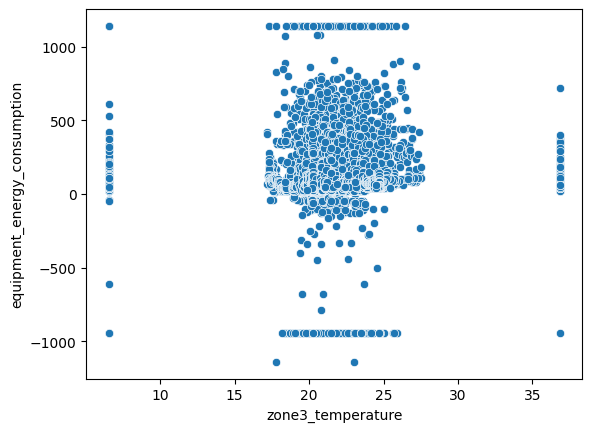

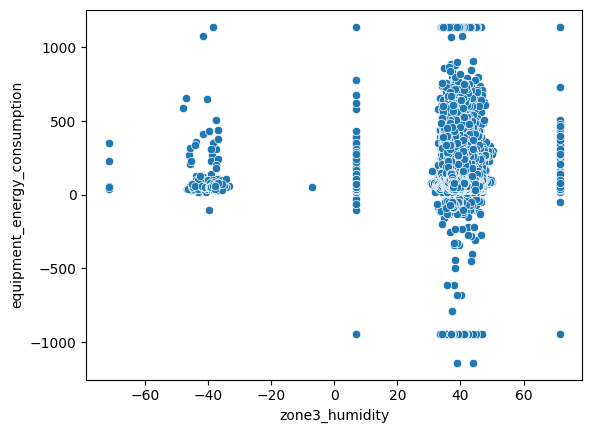

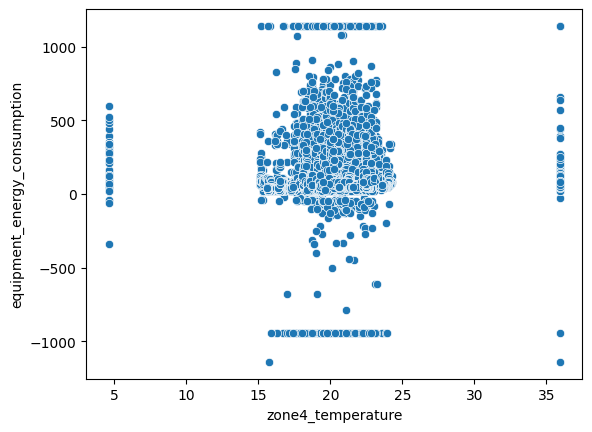

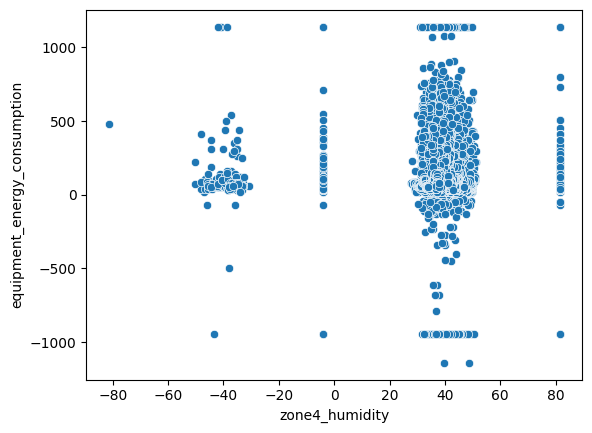

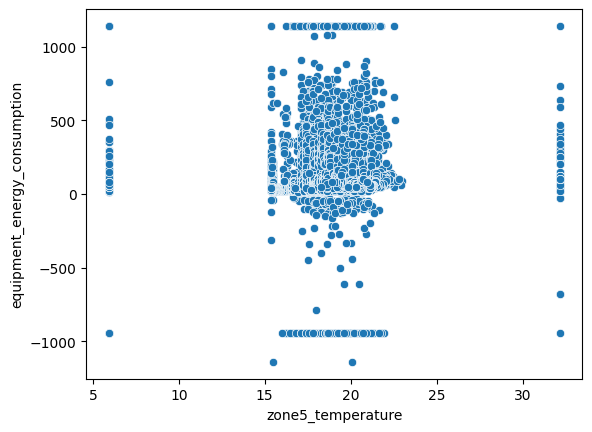

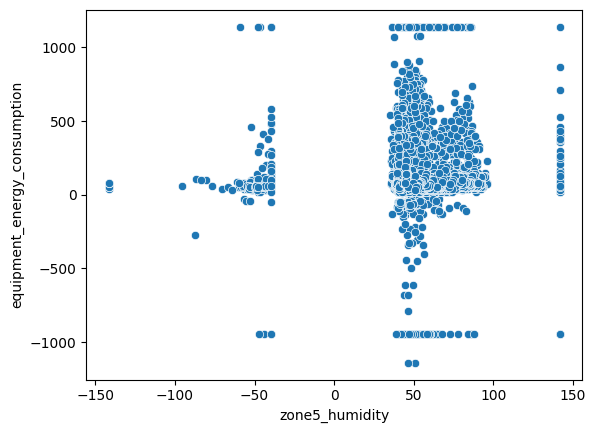

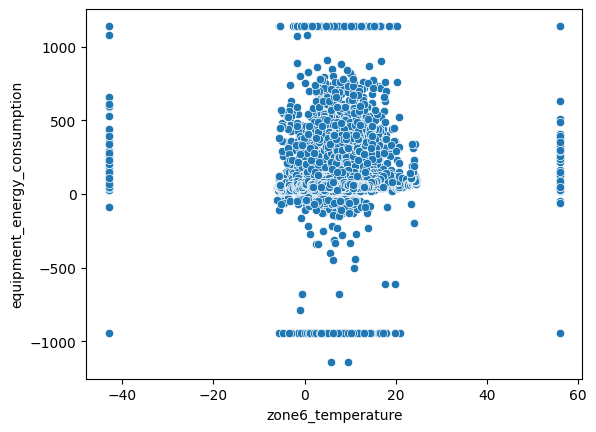

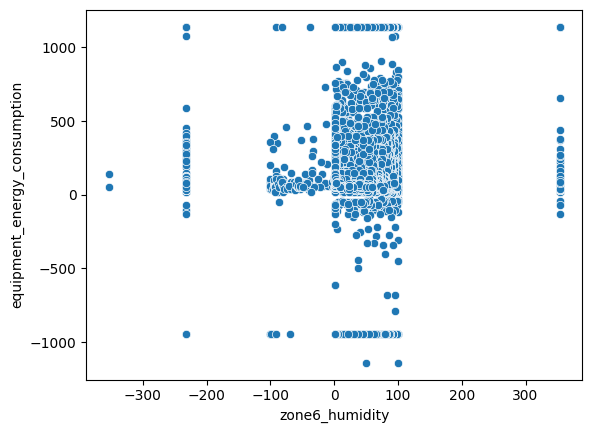

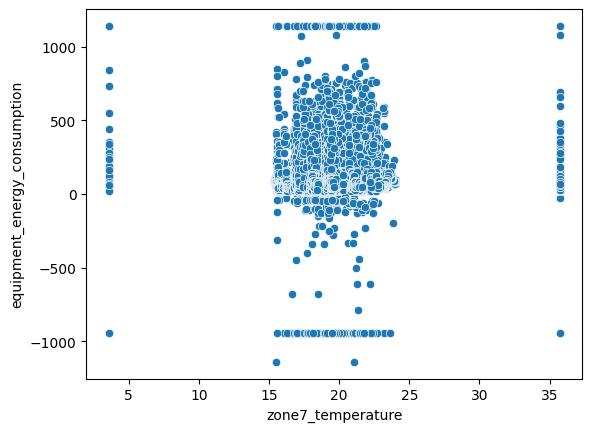

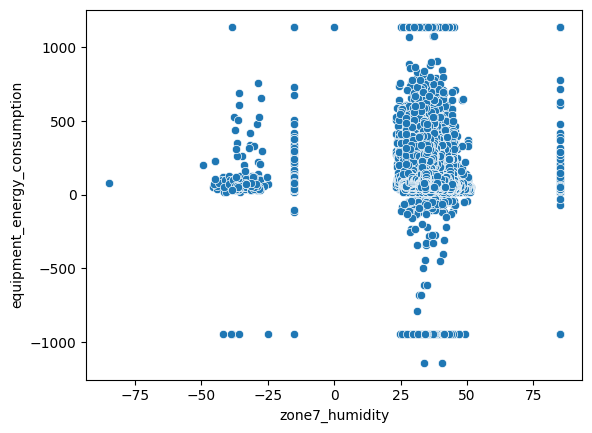

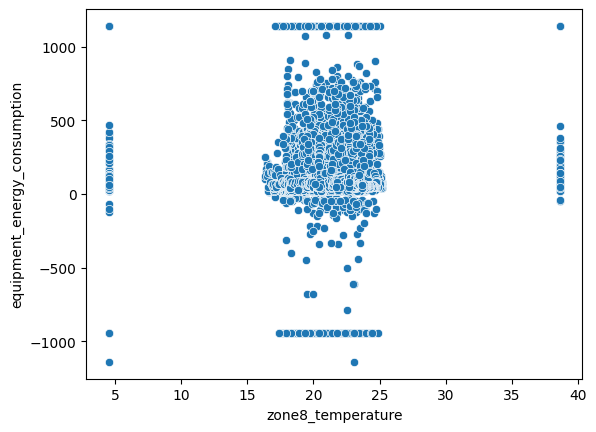

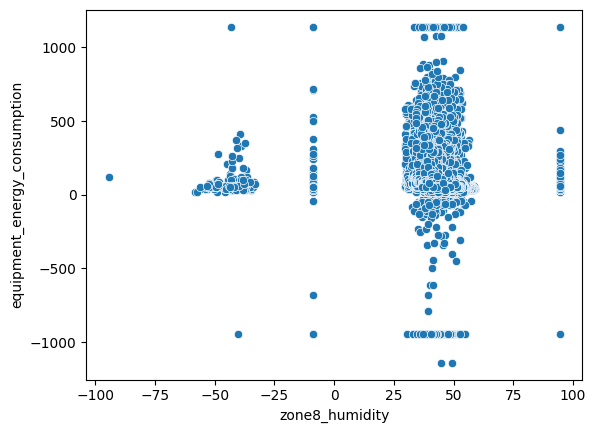

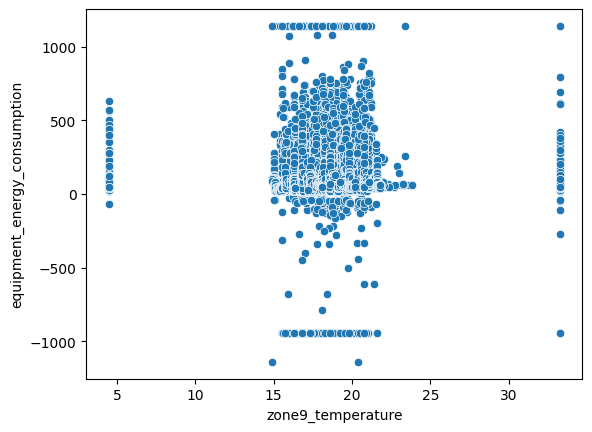

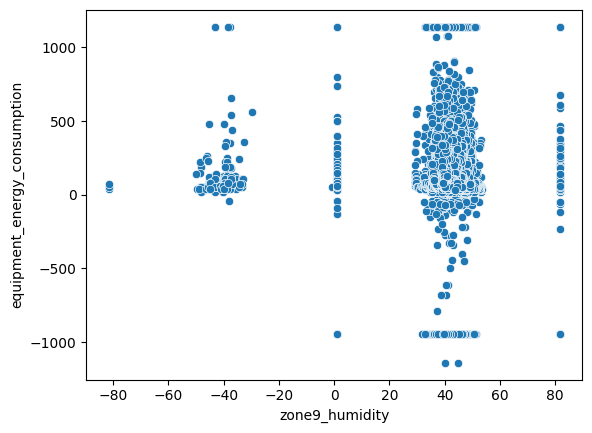

In [64]:
columns = ['zone1_temperature','zone1_humidity','zone2_temperature','zone2_humidity','zone3_temperature','zone3_humidity','zone4_temperature','zone4_humidity','zone5_temperature','zone5_humidity','zone6_temperature','zone6_humidity','zone7_temperature','zone7_humidity','zone8_temperature','zone8_humidity','zone9_temperature','zone9_humidity',]

for col in columns:
    sns.scatterplot(x=col, y='equipment_energy_consumption', data=final_data)
    plt.show() 

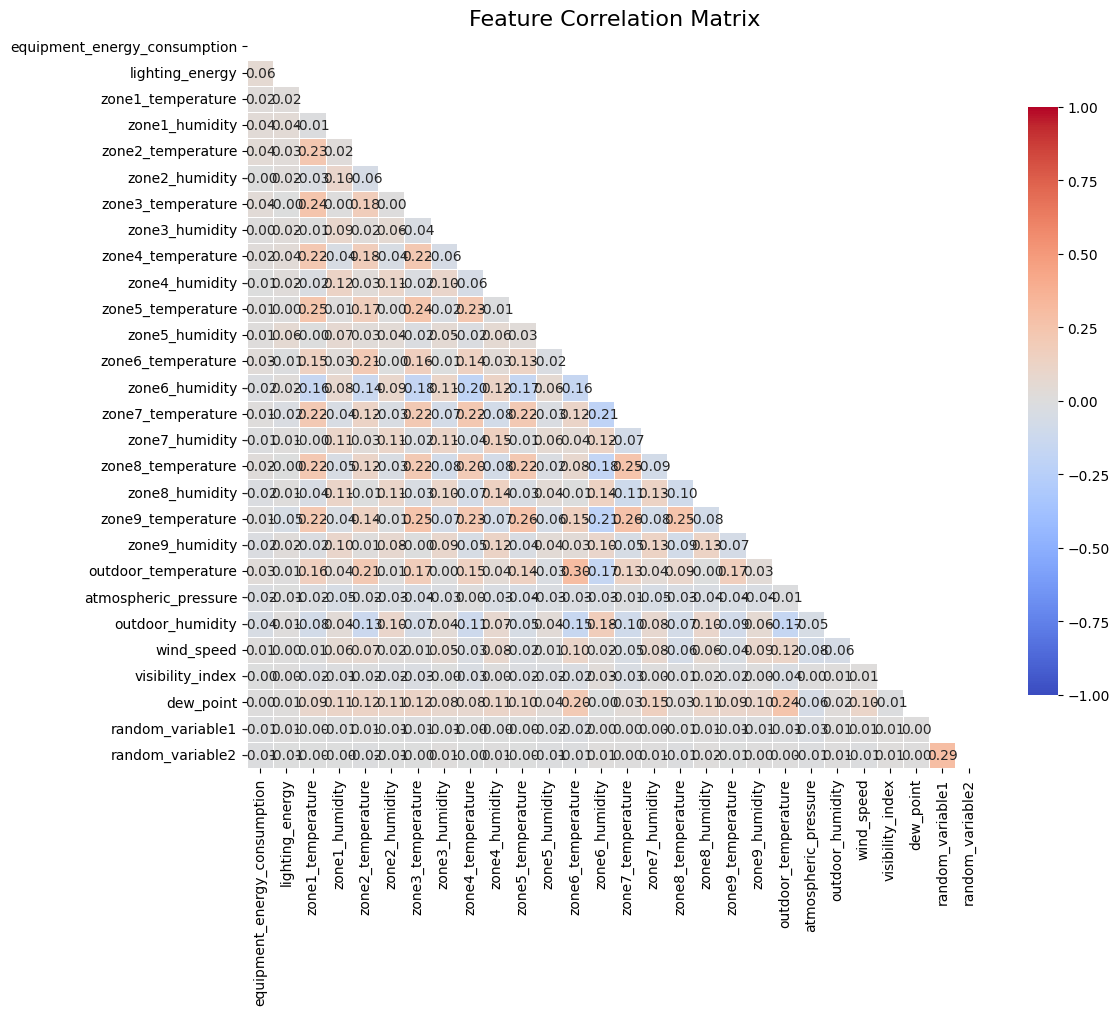

In [ ]:
corr_matrix = final_data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, 
            mask=mask, 
            cmap='coolwarm', 
            vmax=1.0, 
            vmin=-1.0, 
            center=0,
            square=True, 
            linewidths=0.5, 
            annot=True, 
            fmt=".2f",
            cbar_kws={"shrink": 0.8})

plt.title("Feature Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

In [59]:
correlations = final_data.corr()['equipment_energy_consumption'].sort_values(ascending=False)
print(correlations)


equipment_energy_consumption    1.000000
lighting_energy                 0.059357
zone2_temperature               0.042403
zone3_temperature               0.035880
zone1_humidity                  0.035564
outdoor_temperature             0.030464
zone6_temperature               0.027140
zone8_temperature               0.019910
zone1_temperature               0.017963
zone4_temperature               0.017820
wind_speed                      0.013340
zone5_humidity                  0.008730
zone7_temperature               0.008479
zone5_temperature               0.008230
zone9_temperature               0.005239
zone3_humidity                  0.003704
dew_point                       0.000812
visibility_index               -0.001629
zone2_humidity                 -0.003522
zone4_humidity                 -0.006938
random_variable2               -0.009297
random_variable1               -0.011014
zone7_humidity                 -0.011496
atmospheric_pressure           -0.021444
zone8_humidity  

In [60]:
spearman_corr = final_data.corr(method='spearman')['equipment_energy_consumption'].sort_values(ascending=False)
print(spearman_corr)


equipment_energy_consumption    1.000000
zone2_temperature               0.288183
lighting_energy                 0.277326
zone1_temperature               0.237512
zone8_temperature               0.222693
zone3_temperature               0.208381
zone6_temperature               0.200078
zone4_temperature               0.194663
outdoor_temperature             0.179950
zone5_temperature               0.170021
zone7_temperature               0.165997
zone9_temperature               0.153622
wind_speed                      0.088896
dew_point                       0.054870
zone1_humidity                  0.051500
visibility_index               -0.001274
random_variable1               -0.011242
random_variable2               -0.012360
zone4_humidity                 -0.040059
zone5_humidity                 -0.046484
zone3_humidity                 -0.052372
atmospheric_pressure           -0.091247
zone2_humidity                 -0.099159
zone7_humidity                 -0.128734
zone9_humidity  

In [65]:
final_data

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,60.000000,-77.787786,33.746609,47.596667,19.200000,44.790000,19.79,42.332778,19.000000,45.566667,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60.000000,30.000000,19.890000,46.693333,19.200000,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50.000000,30.000000,19.890000,46.300000,19.200000,44.626667,19.79,44.933333,35.921144,45.890000,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50.000000,40.000000,33.746609,46.066667,19.200000,44.590000,19.79,45.000000,18.366667,45.723333,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,37.673716,45.410389,45.410389
4,60.000000,40.000000,19.890000,46.333333,19.200000,44.530000,19.79,45.000000,18.890000,45.530000,...,4.476511,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,1139.985693,20.000000,22.100000,38.723333,19.790000,39.566667,21.29,38.845000,21.390000,35.863333,...,18.100000,40.09,5.816667,761.466667,68.333333,2.000000,64.666667,0.366667,10.707282,10.707282
16853,50.000000,86.002966,21.290000,39.626667,18.100000,44.290000,22.39,38.760000,20.600000,37.900000,...,20.200000,44.50,3.683333,752.250000,96.666667,1.000000,18.000000,3.150000,49.199695,49.199695
16854,50.000000,0.000000,21.390000,37.590000,18.463333,39.966667,21.10,37.790000,20.600000,33.790000,...,18.100000,40.20,1.750000,763.000000,84.166667,1.000000,60.833333,-0.633333,6.905370,6.905370
16855,80.000000,0.000000,22.500000,39.360000,23.600000,35.730000,23.10,38.000000,22.290000,38.000000,...,21.100000,39.53,16.800000,750.166667,50.333333,6.000000,40.000000,6.266667,25.020775,25.020775


In [66]:
data = final_data.copy()

In [67]:
data['outside_feature'] = final_data['outdoor_humidity'] * final_data['outdoor_temperature']

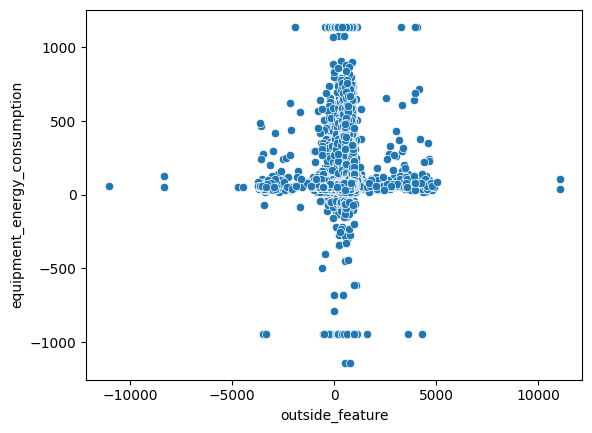

In [71]:
sns.scatterplot(x='outside_feature',y='equipment_energy_consumption',data=data)
plt.show()

In [92]:
final_data.to_csv('processed_data.csv',index = False)

In [11]:
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'])


In [3]:
final_data = pd.read_csv(r'C:\Users\N.NAGESH\Desktop\intern assign\notebooks\processed_data.csv')

In [12]:
df = final_data.copy()
df = df.select_dtypes(exclude=['datetime'])

In [13]:
target_col = 'equipment_energy_consumption'
X = df.drop(columns=[target_col])
y = df[target_col]

In [20]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.4f}')



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6265
[LightGBM] [Info] Number of data points in the train set: 13485, number of used features: 27
[LightGBM] [Info] Start training from score 95.373290
RMSE: 181.5965


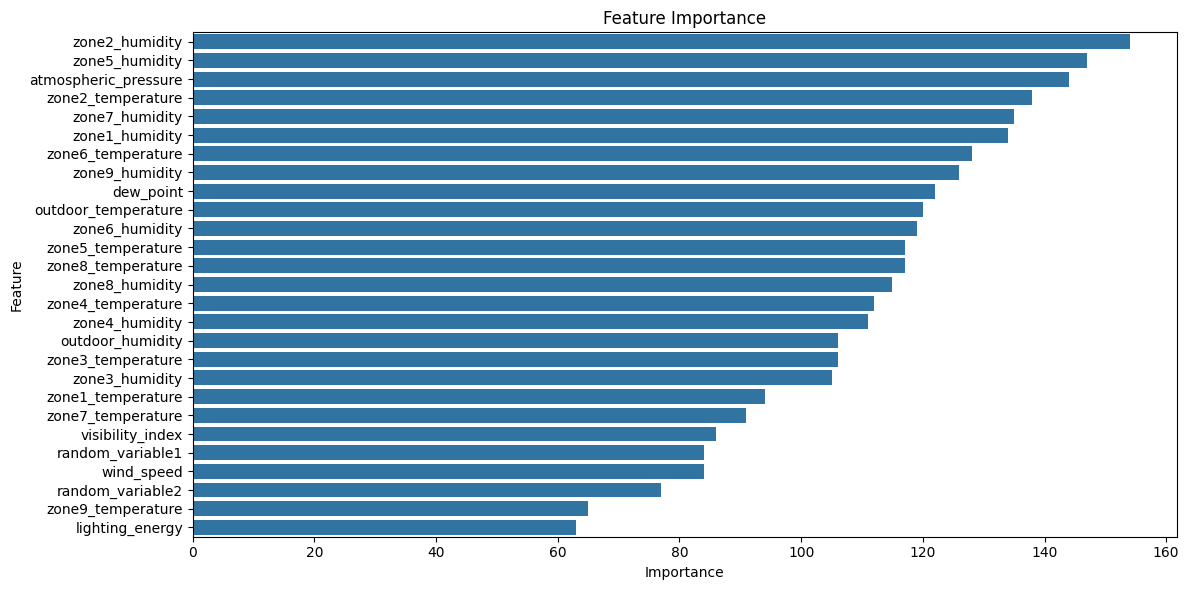

In [21]:
feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

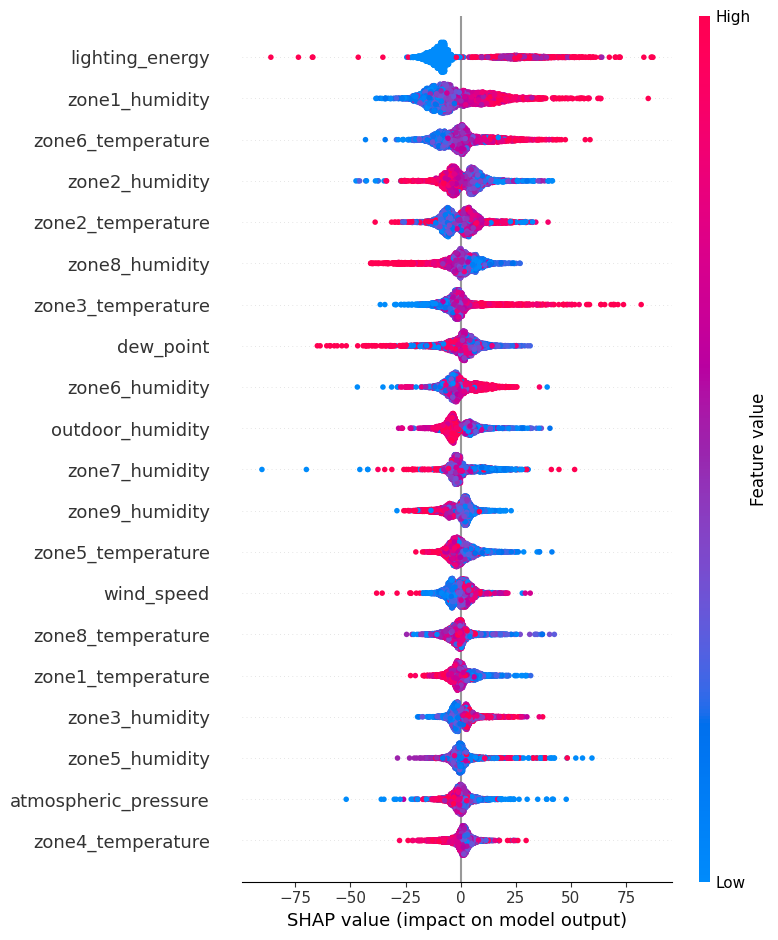

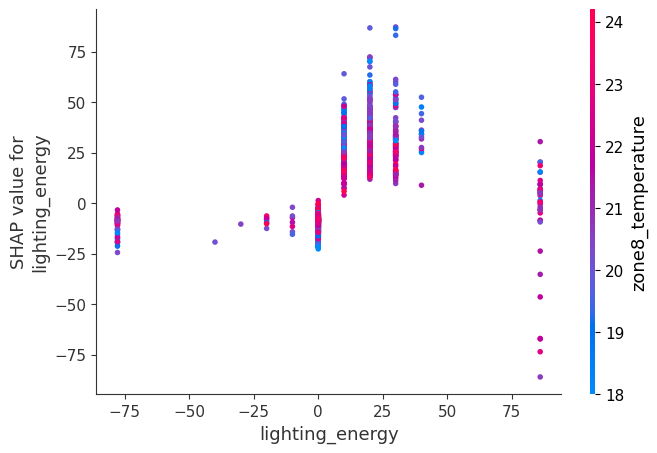

In [23]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Dependence plot for one feature
shap.dependence_plot("lighting_energy", shap_values, X_test)


### from the above graph we can see that the features in the top are responsible for making accurate predictions  